| ISS Tracker | International Space Station Tracker  | IMPORTANT API Endpoint Information |
| ----------- | ----------- | ----------- |
| ISS API url | http://api.open-notify.org/ | ISS Pass predictions are now turned off. Real time current ISS location and number of people in space will continue to operate. |

In [31]:
# libraries
import requests
from geopy.geocoders import Nominatim
import geocoder
from datetime import datetime
from datetime import timezone
import pytz # used for granular timezone data as well as daylight savings time data

import folium 

from astropy.coordinates import EarthLocation, AltAz, get_sun, SkyCoord
from astropy.time import Time
from astropy import units as u

# libraries from udemy course
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
import requests




# config file(s) import
# from config import IP_GEOLOCATION_API_KEY # IMPORTANT - KNOWN ERROR - Quit VS if you adjust this

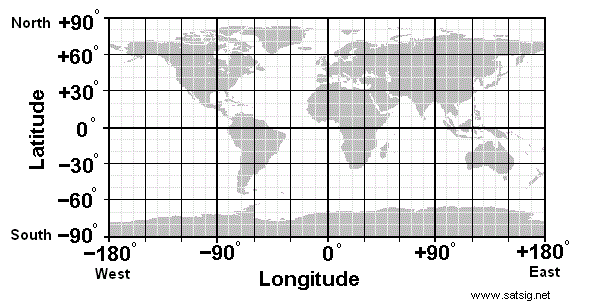

In [32]:
# look at how the coordinates work with a map image
# https://www.satsig.net/lat_long.htm
Image(filename='satsig_explanation.png', width='50%')

In [33]:
"""Get the current location of the ISS"""
# send a GET request to the ISS API endpoint
iss_loc_response = requests.get("http://api.open-notify.org/iss-now.json")
iss_loc_data = iss_loc_response.json()
# print the API parameters
# print(iss_loc_data)

# extract the latitude and longitude for the current location of the ISS
iss_lat = float(iss_loc_data['iss_position']['latitude']) # also, converts lat string to float
iss_long = float(iss_loc_data['iss_position']['longitude']) # also, converts long string to float

# print the current latitude and longitude for the ISS
print("Current ISS Location:")
print(f"Latitude: {iss_lat}")
print(f"Longitude: {iss_long}")

Current ISS Location:
Latitude: -50.5496
Longitude: 139.3492



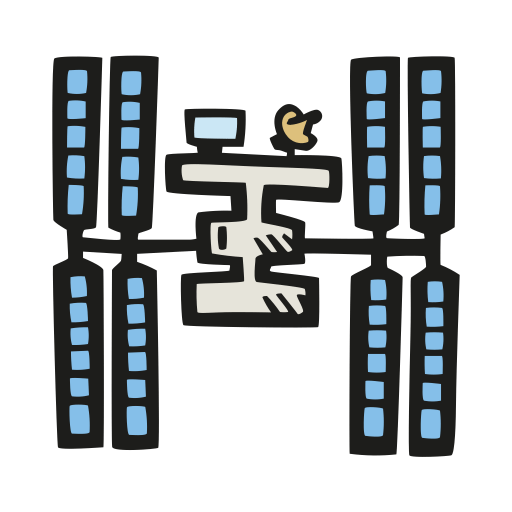

In [34]:
# create a map centered on teh ISS's current location
# map = folium.Map(location=[iss_lat,iss_long], tiles='CartoDB dark_matter', zoom_start=3)
# map = folium.Map(location=[iss_lat,iss_long], tiles='CartoDB Positron', zoom_start=3)
map = folium.Map(location=[iss_lat,iss_long], tiles='stamentoner', zoom_start=5)

# create a custom icon
icon = folium.features.CustomIcon('iss_icon2.png', icon_size=(50,50))
# add marker to map with custom icon
folium.Marker([iss_lat, iss_long], icon=icon).add_to(map)

# display map
display(map)

In [35]:
# determine the astronaughts, cosmonaughts, etc. that are currently onboard the ISS
astros_url = 'http://api.open-notify.org/astros.json'
astros_response = requests.get(astros_url)
astros_data = astros_response.json()
# print(astros_data)

# print the astros that are onboard the ISS craft
print("Number of people currently aboard the ISS:", astros_data['number'])
print("\nNames of people aboard the ISS:")

for i in astros_data['people']:
    print(i['name'])

Number of people currently aboard the ISS: 10

Names of people aboard the ISS:
Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Fei Junlong
Deng Qingming
Zhang Lu
Stephen Bowen
Warren Hoburg
Sultan Alneyadi
Andrey Fedyaev


In [36]:
# get the lat and long for the user's location
geolocator = Nominatim(user_agent="geoapiExercises")
# city = "San Diego"
city = "Rye, NY" # store readable name as an object
location = geolocator.geocode(city) # use the geolocator to get the user's location coordinates
user_lat = location.latitude # returns a float object
user_long = location.longitude # returns a float object

# print my current location based on the city variable
# print(location.latitude, location.longitude)
print(f"User Location: {city}")
print(f"{city} Latitude: {user_lat}")
print(f"{city} Longitude: {user_long}")

User Location: Rye, NY
Rye, NY Latitude: 40.9808209
Rye, NY Longitude: -73.684294


In [37]:
# api call to GET sunrise and sunset times
sunrise_sunset_url = 'https://api.sunrise-sunset.org/json'
parameters = {
    'lat': user_lat,
    'lng': user_long,
    'formatted': 0,
    'date': datetime.now().strftime("%Y-%m-%d")
}

# get the sun response
sun_response = requests.get(url=sunrise_sunset_url, params=parameters)
# get sun data as JSON
sun_data = sun_response.json()

# extract sunrise and sunset times in UTC time
sunrise = sun_data["results"]["sunrise"]
sunset = sun_data["results"]["sunset"]
# print(f'UTC time Sunrise: {sunrise}\nUTC time Sunset: {sunset}')

# convert UTC time to New York time
local_tz = pytz.timezone("America/New_York") # FIX to auto determine
sunrise = datetime.strptime(sunrise, '%Y-%m-%dT%H:%M:%S%z').replace(tzinfo=pytz.UTC).astimezone(local_tz)
sunset = datetime.strptime(sunset, '%Y-%m-%dT%H:%M:%S%z').replace(tzinfo=pytz.UTC).astimezone(local_tz)

# get today's date
now = datetime.now()
today = now.date()

# print the date and the sunrise / sunset times
# print("Today's date:", today)
print(f'Sunrise: {sunrise}')
print(f'Sunset: {sunset}')

Sunrise: 2023-03-13 07:08:13-04:00
Sunset: 2023-03-13 19:00:11-04:00


In [38]:
# GET the TLE (Two Line Element) for the international space station -> we will use this later to identify the ISS
celestrak_url = 'https://www.celestrak.com/NORAD/elements/stations.txt'
celestrak_response = requests.get(celestrak_url)

# API working check
if celestrak_response.status_code == 200:
    print("Status Code: 200")
else:
    print("API Error")

# the TLE data can be accessed from celestrak_response.content
# print(celestrak_response.content)

Status Code: 200


In [39]:
# split response into individual lines
lines = celestrak_response.text.splitlines()
# print(lines)

# find the line that contains the response for the ISS TLE data
for i in range(0, len(lines), 3): # the 3 in the range function in the for-loop is the step size.
    if lines[i].startswith('ISS'):
        tle0 = lines[i]
        tle1 = lines[i+1]
        tle2 = lines[i+2]
        break

# print TLE data for the ISS
print('TLE Data For The ISS')
print('Line #1 = Satellite Name, Line #2 = First Line of TLE Data, Line #3 = Third Line of TLE Data.')
print()
print(tle0)
print(tle1)
print(tle2)


TLE Data For The ISS
Line #1 = Satellite Name, Line #2 = First Line of TLE Data, Line #3 = Third Line of TLE Data.

ISS (ZARYA)             
1 25544U 98067A   23072.83551765  .00019982  00000+0  36637-3 0  9990
2 25544  51.6406  80.8915 0005807  81.0948 340.6442 15.49265283387001


In [40]:
# determine an approximate location relative to my exact location
approx_geolocator = Nominatim(user_agent="my-app")
approx_user_location = approx_geolocator.reverse(f"{user_lat}, {user_long}")

# print approximate user location
print(approx_user_location.address) 

Rye City Hall, 1051, Boston Post Road, City of Rye, Westchester County, New York, 10580, United States


| ISS Information | General |
| ----------- | ----------- |

* 90 minutes to complete 1 rotation around the earth
* The distance at which the ISS is visible from the ground depends on various factors such as the altitude of the ISS, the brightness of the ISS, the lighting conditions, and the weather conditions. Generally, the ISS is visible from the ground at a maximum distance of around 2,000 kilometers (1,200 miles) under ideal viewing conditions.
* The ISS is in low-earth orbit, so it won't maintain a specific ground-track along the earth.
* Technically speaking, the ISS is both a satellite and a spacecraft, but it is not a conventional satellite in the sense that it was not designed to orbit the Earth on its own.
    * Therefore, while the ISS does technically qualify as a satellite, it is more commonly referred to as a spacecraft or space station to differentiate it from other types of satellites.
* TLE stands for "Two-Line Element" and it is a data format used to describe the orbit of a satellite. 
    * The TLE format was developed by the United States Department of Defense to describe the orbits of objects in Earth orbit, such as satellites and space debris.
    * Computer programs used to track satellites take into account factors such as the Earth's rotation, gravitational forces, and atmospheric drag to predict the satellite's location and movement over time.

| ISS Important Variables |
| ----------- |
1. TIME - is when the sighting opportunity will begin in your local time zone. All sightings will occur within a few hours before or after sunrise or sunset. This is the optimum viewing period as the sun reflects off the space station and contrasts against the darker sky.

2. VISIBLE - is the maximum time period the space station is visible before crossing back below the horizon.

3. MAX_HEIGHT - is measured in degrees (also known as elevation). It represents the height of the space station from the horizon in the night sky. The horizon is at zero degrees, and directly overhead is ninety degrees. If you hold your fist at arm's length and place your fist resting on the horizon, the top will be about 10 degrees.

4. APPEARS - is the location in the sky where the station will be visible first. This value, like maximum height, also is measured in degrees from the horizon. The letters represent compass directions -- N is north, WNW is west by northwest, and so on.

5. DISSAPEARS - represents where in the night sky the International Space Station will leave your field of view.

| Coding Considerations / Planning & Ideas |
| ----------- |
* XXX
* XXX



| END OF PROGRAM | 
| ----------- |

In [41]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

In [42]:
# get the location of my ip address
g = geocoder.ip('me')
my_latitude, my_longitude = g.latlng
print("Latitude:", my_latitude) # float
print("Longitude:", my_longitude) # float

Latitude: 32.7635
Longitude: -117.2028


In [43]:
# get my location geocoded aka reverse coded address
geolocator = Nominatim(user_agent="my-app")
my_location = geolocator.reverse(f"{my_latitude}, {my_longitude}")

# print a location near to where I am -> close enough at least for ISS viewing
# print(my_location.address) 

In [44]:
"""Get the latitude and longitude of the users location"""
# get my devices public ip address
device_public_ip_response = requests.get("http://icanhazip.com")
device_public_ip = device_public_ip_response.text.strip()

# print(f"My Public IP Address: {device_public_ip}")

device_public_ip

'208.71.27.119'

In [45]:
response = requests.get(f"https://ipgeolocation.io/ipgeo?apiKey={IP_GEOLOCATION_API_KEY}&ip={device_public_ip}")
data = response.json()

# latitude = data["latitude"]
# longitude = data["longitude"]

# print(f"Latitude: {latitude}")
# print(f"Longitude: {longitude}")


NameError: name 'IP_GEOLOCATION_API_KEY' is not defined

In [ ]:
# get my location
device_loc_response = requests.get(f"https://ipgeolocation.io/ipgeo?apiKey={IP_GEOLOCATION_API_KEY}&ip='24.188.168.62'")
device_loc_data = device_loc_response.json()

In [ ]:
# convert lat/long strings to float objects
iss_latitude_float = float(iss_latitude_string)
iss_longitude_float = float(iss_longitude_string)

# print lat/long as float objects
print(iss_latitude_float)
print(iss_longitude_float)

-45.8932
14.2831


In [ ]:
"""Get the latitude and longitude of the users location"""

ip_address = "8.8.8.8"

response = requests.get(f"https://ipgeolocation.io/ipgeo?apiKey={IP_GEOLOCATION_API_KEY}&ip={ip_address}")
data = response.json()

latitude = data["latitude"]
longitude = data["longitude"]

print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")


In [ ]:
"""Get the latitude and longitude of the users location"""
# GET the user's location
user_loc_response = requests.get(f"https://api.ipgeolocation.io/ipgeo?apiKey={IP_GEOLOCATION_API_KEY}")
user_loc_data = user_loc_response.json()
print(user_loc_data)

# # extract the latitude and longitude from the response
# user_latitude = float(user_loc_data["latitude"])
# user_longitude = float(user_loc_data["longitude"])

# # print the latitude and longitude of the users location
# print(f"User's Latitude: {user_latitude}")
# print(f"User's Longitude: {user_longitude}")



{'message': 'Provided API key is not valid. Contact technical support for assistance at support@ipgeolocation.io'}


In [ ]:
# Create a geolocator object
geolocator = Nominatim(user_agent="my-app")

# Define the latitude and longitude
latitude = -32.5395
longitude = -75.9591

# Use the geolocator to reverse geocode the location
location = geolocator.reverse(f"{latitude}, {longitude}")

if location is not None:
    # Extract the address components from the location
    address = location.raw["address"]
    country = address.get("country", "")
    ocean = address.get("ocean", "")
    sea = address.get("sea", "")

    # Print the results
    if country:
        print(f"Country: {country}")
    if ocean:
        print(f"Ocean: {ocean}")
    if sea:
        print(f"Sea: {sea}")
else:
    print("Location not found.")


Location not found.


In [ ]:
latitude = iss_latitude_float
longitude = iss_longitude_float

In [ ]:
geolocator = Nominatim(user_agent="my-app")
latitude = -32.5395
longitude = iss_longitude_float

location = geolocator.reverse(f'{latitude}, {longitude}')
print(location)

# extract address components from the ISS location
# address = iss_proximity_location.raw["address"]
# country = address.get("country", "")
# ocean = address.get("ocean", "")
# sea = address.get("sea", "")

# if country:
#     print(f"Country: {country}")
# if ocean:
#     print(f"Ocean: {ocean}")
# if sea:
#     print(f"Sea: {sea}")
# else:
#     print("Location not found.")



None


In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my-app")

# Define the latitude and longitude
latitude = 40.7128
longitude = -74.0060

# Use the geolocator to reverse geocode the location
location = geolocator.reverse(f"{latitude}, {longitude}")

if location is not None:
    # Extract the address components from the location
    address = location.raw["address"]
    country = address.get("country", "")
    ocean = address.get("ocean", "")
    sea = address.get("sea", "")

    # Print the results
    if country:
        print(f"Country: {country}")
    if ocean:
        print(f"Ocean: {ocean}")
    if sea:
        print(f"Sea: {sea}")
else:
    print("Location not found.")


Country: United States


In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my-app")

# Define the latitude and longitude
latitude = 40.7128
longitude = -74.0060

# Use the geolocator to reverse geocode the location
location = geolocator.reverse(f"{latitude}, {longitude}")

if location is not None:
    # Extract the address components from the location
    address = location.raw["address"]
    country = address.get("country", "")
    ocean = address.get("ocean", "")
    sea = address.get("sea", "")

    # Print the results
    if country:
        print(f"Country: {country}")
    if ocean:
        print(f"Ocean: {ocean}")
    if sea:
        print(f"Sea: {sea}")
else:
    print("Location not found.")


Country: United States
